## Visualizing data
Since there are a total of 561 features, we must understand our data and handle it accordingly.
Firstly lets check frequency of each participant for their activity.

In [11]:
! pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
! pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


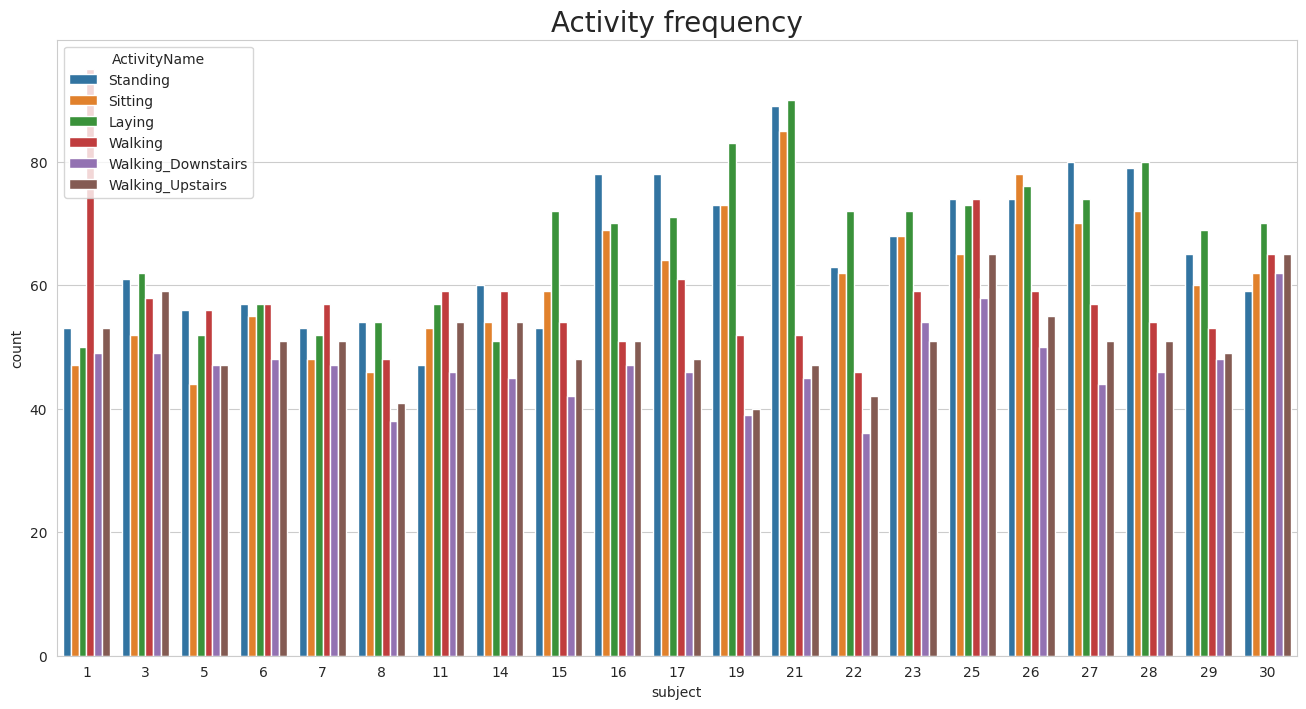

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('../data/processed/train.csv')

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'


plt.figure(figsize = (16,8))
plt.title('Activity frequency of each user', fontsize = 20)
sns.countplot(x='subject', hue='ActivityName', data = df)
plt.show()

We can observe that each participant is walking upstairs more than they are downstairs, assuming they had to walk same number of stairs upward and downward.

## Activity frequency
Lets check which activity is done the highest for any fluctuations.

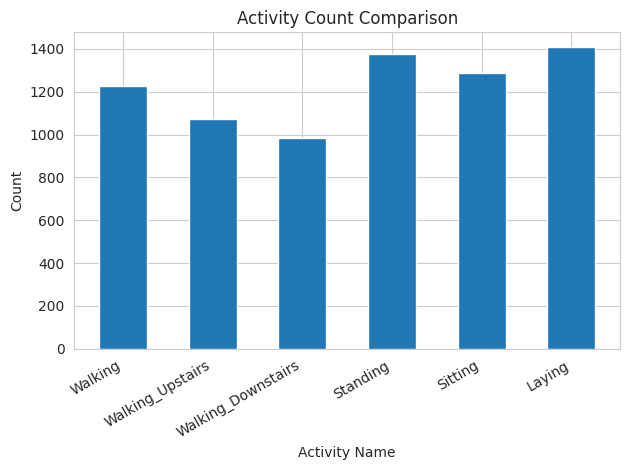

In [10]:
import numpy as np

activity_counts = df['ActivityName'].value_counts()

activities_to_compare = ['Walking', 'Walking_Upstairs', 'Walking_Downstairs','Standing','Sitting','Laying']
filtered_counts = activity_counts[activities_to_compare]

activities = filtered_counts.index
counts = filtered_counts.values
positions = np.arange(len(activities)) * 1.5  # Increase spacing

plt.bar(positions, counts, width=0.8)
plt.xticks(positions, activities, rotation=30, ha='right')

plt.title("Activity Count Comparison")
plt.ylabel("Count")
plt.xlabel("Activity Name")

plt.tight_layout()
plt.show()


There is minimal fluctuation from the observed bar graph.

## Static vs Dynamic activities
Let us check features which are relevant to distinguish static(eg: laying) vs dynamic(eg: walking) activities.

In [12]:
#Firstly lets classify the tasks into static vs dynamic

dynamic_activities = ['Walking', 'Walking_Upstairs', 'Walking_Downstairs']

df_2classes = df.copy()

df_2classes['activity_type'] = df_2classes['ActivityName'].apply(
    lambda x: 'dynamic' if x in dynamic_activities else 'static'
)

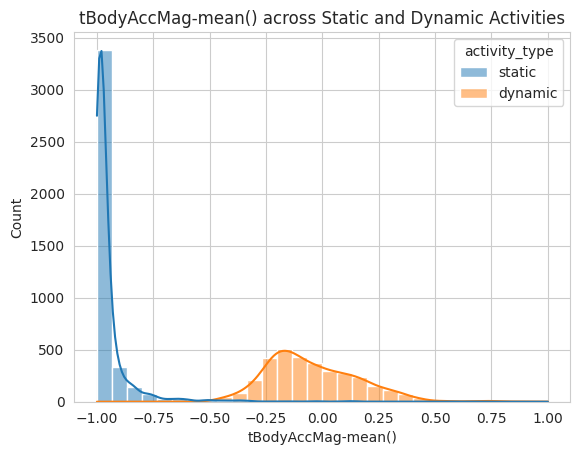

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: for 'tBodyAcc-mean()-X'
sns.histplot(data=df_2classes, x='tBodyAccMag-mean()', hue='activity_type', kde=True, bins=30)
plt.title('tBodyAccMag-mean() across Static and Dynamic Activities')
plt.show()


## We observe the following
1. If tBodyAccMag-mean() < -0.50 it is static.
2. if tBodyAccMag-mean() > -0.50 it is dynamic.

Next let's plot a boxplot of tBodyAccMag-mean() for all activities.

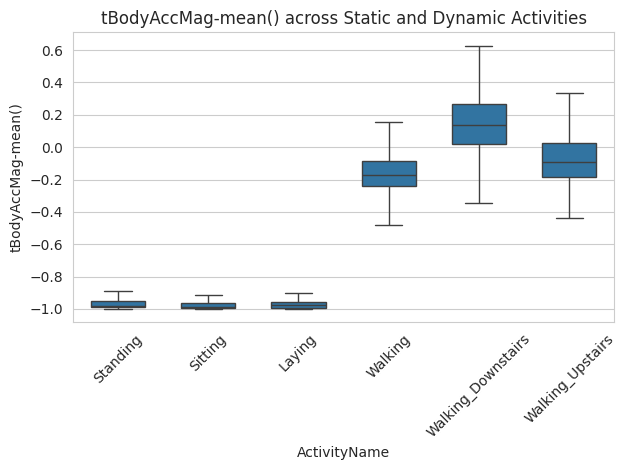

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='ActivityName', y='tBodyAccMag-mean()', data=df, showfliers=False, width=0.6)
plt.title('tBodyAccMag-mean() across Static and Dynamic Activities')

plt.xticks(rotation=45) 
plt.tight_layout()  

plt.show()

## Let us next check the effect of Gravity Accelearation values on our Activity.

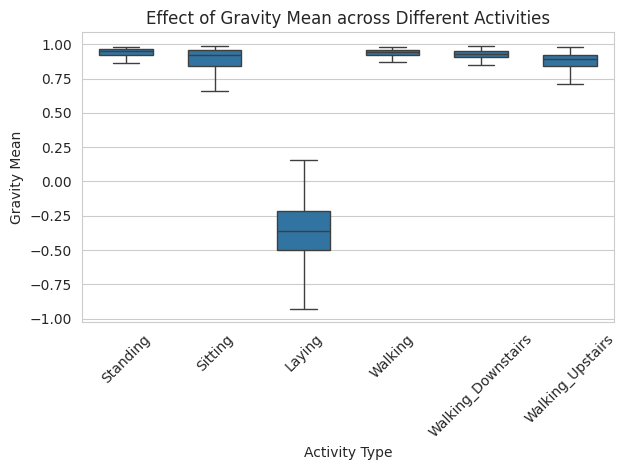

In [61]:
sns.boxplot(x='ActivityName', y='tGravityAcc-mean()-X', data=df, showfliers=False, width=0.6)

# Set title and labels
plt.title('Effect of Gravity Mean across Different Activities')
plt.xlabel('Activity Type')
plt.ylabel('Gravity Mean')

plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

## Observations
1. If tGravityAcc-mean()-X < 0.25 its laying.